# Correlation function and BAO peaks of DR72 SDSS VAGC Catalog

First import all the modules such as healpy and astropy needed for analyzing the structure

In [2]:
import healpix_util as hu
import astropy as ap
import numpy as np
from astropy.io import fits
from astropy.table import Table
import astropy.io.ascii as ascii
from astropy.io import fits
from astropy.constants import c
import matplotlib.pyplot as plt
import math as m
from math import pi
#from scipy.constants import c
import scipy.special as sp
from astroML.decorators import pickle_results
from scipy import integrate
import warnings
from sklearn.neighbors import BallTree
import pickle
import multiprocessing as mp
import time
#from lccmetric import *
from progressbar import *
from tqdm import *
from functools import partial
import pymangle
from scipy.optimize import curve_fit
#from astroML.datasets import fetch_sdss_specgals
#from astroML.correlation import bootstrap_two_point_angular
%matplotlib inline

In [3]:
bins=np.arange(0.,0.08,0.005)

In [4]:
print bins

[ 0.     0.005  0.01   0.015  0.02   0.025  0.03   0.035  0.04   0.045
  0.05   0.055  0.06   0.065  0.07   0.075]


In [5]:
binMpc=c*1e-5*bins[1:len(bins)]

In [6]:
print binMpc

[  14.9896229   29.9792458   44.9688687   59.9584916   74.9481145
   89.9377374  104.9273603  119.9169832  134.9066061  149.896229
  164.8858519  179.8754748  194.8650977  209.8547206  224.8443435] m / s


In [7]:
DDf=np.array([  376599,  1245978,  2826185,  5151737,  8156128, 11846922,
       16171658, 20996832, 26338279, 32090647, 38244493, 44703147,
       51450171, 58468581, 65667922])

In [8]:
RRf=np.array([   643435,   4041756,  10512085,  19769200,  31628364,  45946557,
        62534839,  81156182, 101645162, 123804352, 147416610, 172291247,
       198247385, 225034691, 252578087])

In [9]:
DRf=np.array([   295060,   1994482,   5218449,   9842717,  15798756,  23014872,
        31354659,  40802390,  51199047,  62501581,  74502664,  87208020,
       100471995, 114144670, 128180280])

In [10]:
correlf=(4.0 * DDf - 4.0 * DRf + RRf) / RRf

In [11]:
correlf

array([ 1.50689813,  0.25922891,  0.08970903,  0.05085082,  0.03344631,
        0.02774434,  0.02882929,  0.02382998,  0.02166448,  0.01745186,
        0.01617135,  0.01318555,  0.01089593,  0.01035545,  0.01001138])

In [11]:
DDc=np.array([  430556,  1114599,  2525859,  4682258,  7580242, 11210594,
       15494184, 20333206, 25595524, 31256250, 37268677, 43632001,
       50352286, 57359810, 64622022])

In [12]:
RRc=np.array([   740302,   3503169,   9364047,  18228452,  29683412,  43369250,
        59250681,  77493322,  98000981, 120263531, 143859910, 167930727,
       192506956, 218264153, 245484297])

In [13]:
DRc=np.array([   254634,   1719873,   4644253,   9066109,  14768425,  21645680,
        29640929,  38908451,  49347999,  60683031,  72811227,  85150370,
        97809112, 111106279, 125306147])

In [14]:
correlc=(4.0 * DDc - 4.0 * DRc + RRc) / RRc

In [15]:
correlc

array([ 1.95054181,  0.30888404,  0.09509467,  0.03802012,  0.03135354,
        0.03755901,  0.04495646,  0.04119506,  0.03052093,  0.02125671,
        0.01174552,  0.01105963,  0.01391977,  0.01501977,  0.01119337])

In [16]:
DDo=np.array([  331281,  1116305,  2527931,  4684655,  7583290, 11213608,
       15496093, 20336243, 25596801, 31258220, 37270412, 43632843,
       50353792, 57360863, 64623361])

In [17]:
RRo=np.array([   547656,   3511813,   9374865,  18238861,  29691691,  43377917,
        59259542,  77500037,  98013097, 120268860, 143866480, 167933473,
       192509954, 218269183, 245488607])

In [18]:
DRo=np.array([   259445,   1724093,   4650120,   9071135,  14773645,  21649996,
        29645220,  38913722,  49352896,  60686351,  72814042,  85152932,
        97810839, 111107554, 125309680])

In [19]:
correlo=(4.0 * DDo - 4.0 * DRo + RRo) / RRo

In [20]:
correlo

array([ 1.52467973,  0.30772168,  0.09451965,  0.03799256,  0.03133102,
        0.03763124,  0.04493848,  0.04116283,  0.03049304,  0.02125518,
        0.01176063,  0.01103483,  0.01393053,  0.0150384 ,  0.01117498])

In [12]:
DDs=np.array([  328694,  1029545,  2291282,  4147862,  6554042,  9497129,
       12989300, 16908377, 21224962, 25940421, 30956138, 36318577,
       41861964, 47699516, 53698417])

In [13]:
RRs=np.array([   524864,   3256023,   8479597,  15957280,  25557294,  37154783,
        50626355,  65797017,  82516733, 100664495, 120087370, 140636145,
       162143809, 184495136, 207523156])

In [14]:
DRs=np.array([   236152,   1599524,   4188580,   7905907,  12705700,  18520232,
        25272714,  32915799,  41374438,  50587003,  60461246,  70878589,
        81876261,  93286095, 105014199])

In [15]:
correls=(4.0 * DDs - 4.0 * DRs + RRs) / RRs

In [16]:
correls

array([ 1.7052646 ,  0.29978504,  0.10500558,  0.05797354,  0.03719729,
        0.02859312,  0.02948462,  0.02686032,  0.02325382,  0.02064449,
        0.01721195,  0.01703756,  0.01286895,  0.01164703,  0.01089049])

In [26]:
corthl=(binMpc/10.0)**(-1.8)
print corthl

[ 0.48258823  0.13858708  0.06679723  0.03979869  0.02663365  0.01918247
  0.01453451  0.01142917  0.00924571  0.00764851  0.00644273  0.00550872
  0.00476956  0.00417394  0.00368648] s(9/5) / m(9/5)


In [27]:
def powlaw(x, a, b):
    return (x/a)**b

In [28]:
popt, pcov = curve_fit(powlaw, binMpc[0:5], correls[0:5])

NameError: name 'curve_fit' is not defined

In [29]:
popt

NameError: name 'popt' is not defined

In [30]:
pcov

NameError: name 'pcov' is not defined

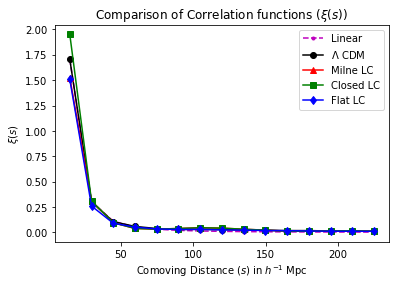

In [60]:
plt.figure()
plt.xlabel('Comoving Distance ($s$) in $h^{-1}$ Mpc')
plt.ylabel('$\\xi (s)$')
plt.title('Comparison of Correlation functions ($\\xi (s)$)')
#plt.plot(binMpc,corthl,'m.--',label='Linear')
plt.plot(binMpc, powlaw(binMpc,*popt),'m.--',label='Linear')
plt.plot(binMpc,correls,'ko-',label='$\Lambda$ CDM')
plt.plot(binMpc,correlo,'r^-',label='Milne LC')
plt.plot(binMpc,correlc,'gs-',label='Closed LC')
plt.plot(binMpc,correlf,'bd-',label='Flat LC')
plt.legend()
plt.savefig("./plots/correlcomp.pdf")
plt.show()

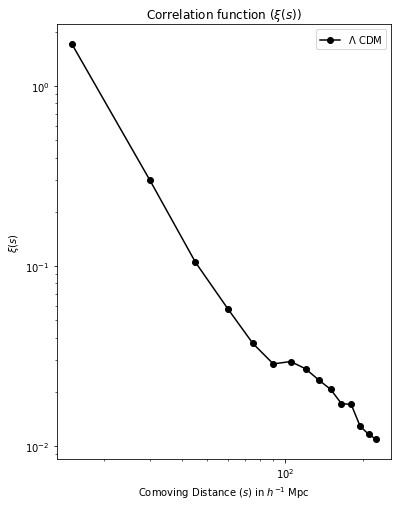

In [13]:
plt.figure(figsize=(6,8))
plt.xlabel('Comoving Distance ($s$) in $h^{-1}$ Mpc')
plt.ylabel('$\\xi (s)$')
plt.title('Correlation function ($\\xi (s)$)')
plt.yscale('log')
plt.xscale('log')
#plt.plot(binMpc,corthl,'m.--',label='Linear')
#plt.plot(binMpc, powlaw(binMpc,*popt),'m.--',label='Linear')
plt.plot(binMpc,correls,'ko-',label='$\Lambda$ CDM')
#plt.plot(binMpc,correlo,'r^-',label='Milne LC')
#plt.plot(binMpc,correlc,'gs-',label='Closed LC')
#plt.plot(binMpc,correlf,'bd-',label='Flat LC')
plt.legend()
plt.savefig("./plots/correlcompxylog.pdf")
plt.show()

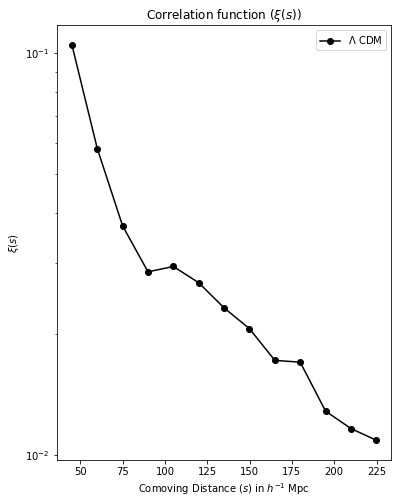

In [17]:
plt.figure(figsize=(6,8))
plt.xlabel('Comoving Distance ($s$) in $h^{-1}$ Mpc')
plt.ylabel('$\\xi (s)$')
plt.title('Correlation function ($\\xi (s)$)')
plt.yscale('log')
#plt.yticks(arange(10),([0.001,0.1,0.01])
#plt.xticks()
#plt.xscale('log')
#plt.plot(binMpc,corthl,'m.--',label='Linear')
#plt.plot(binMpc, powlaw(binMpc,*popt),'m.--',label='Linear')
plt.plot(binMpc[2:],correls[2:],'ko-',label='$\Lambda$ CDM')
#plt.plot(binMpc,correlo,'r^-',label='Milne LC')
#plt.plot(binMpc,correlc,'gs-',label='Closed LC')
#plt.plot(binMpc,correlf,'bd-',label='Flat LC')
plt.legend()
plt.savefig("./plots/correlcompylog.pdf")
plt.show()

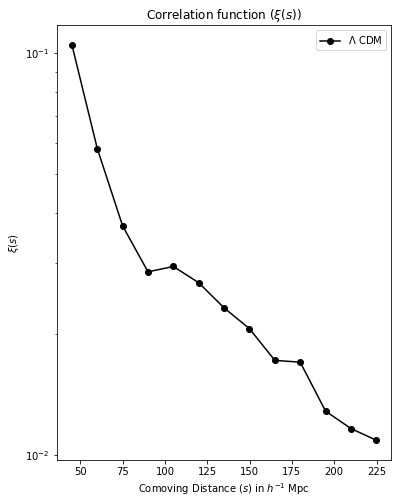

In [18]:
plt.figure(figsize=(6,8))
plt.xlabel('Comoving Distance ($s$) in $h^{-1}$ Mpc')
plt.ylabel('$\\xi (s)$')
plt.title('Correlation function ($\\xi (s)$)')
plt.yscale('log')
#plt.yticks(arange(10),([0.001,0.1,0.01])
#plt.xticks()
#plt.xscale('log')
#plt.plot(binMpc,corthl,'m.--',label='Linear')
#plt.plot(binMpc, powlaw(binMpc,*popt),'m.--',label='Linear')
plt.plot(binMpc[2:],correls[2:],'ko-',label='$\Lambda$ CDM')
#plt.plot(binMpc,correlo,'r^-',label='Milne LC')
#plt.plot(binMpc,correlc,'gs-',label='Closed LC')
#plt.plot(binMpc,correlf,'bd-',label='Flat LC')
plt.legend()
plt.savefig("./plots/correlcompylog.pdf")
plt.show()

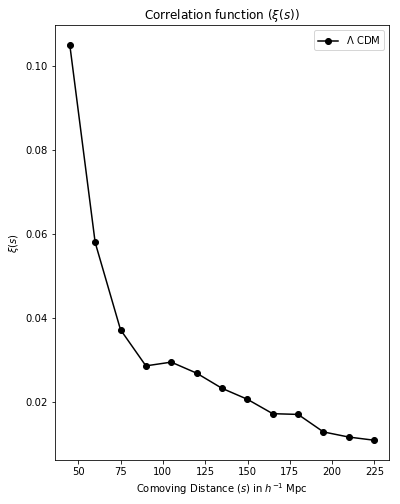

In [18]:
plt.figure(figsize=(6,8))
plt.xlabel('Comoving Distance ($s$) in $h^{-1}$ Mpc')
plt.ylabel('$\\xi (s)$')
plt.title('Correlation function ($\\xi (s)$)')
#plt.yscale('log')
#plt.yticks(arange(10),([0.001,0.1,0.01])
#plt.xticks()
#plt.xscale('log')
#plt.plot(binMpc,corthl,'m.--',label='Linear')
#plt.plot(binMpc, powlaw(binMpc,*popt),'m.--',label='Linear')
plt.plot(binMpc[2:],correls[2:],'ko-',label='$\Lambda$ CDM')
#plt.plot(binMpc,correlo,'r^-',label='Milne LC')
#plt.plot(binMpc,correlc,'gs-',label='Closed LC')
#plt.plot(binMpc,correlf,'bd-',label='Flat LC')
plt.legend()
plt.savefig("correlcomp.pdf")
plt.show()

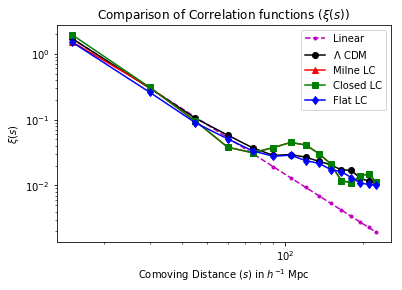

In [62]:
plt.figure()
plt.xlabel('Comoving Distance ($s$) in $h^{-1}$ Mpc')
plt.ylabel('$\\xi (s)$')
plt.title('Comparison of Correlation functions ($\\xi (s)$)')
plt.yscale('log')
plt.xscale('log')
#plt.plot(binMpc,corthl,'m.--',label='Linear')
plt.plot(binMpc, powlaw(binMpc,*popt),'m.--',label='Linear')
plt.plot(binMpc,correls,'ko-',label='$\Lambda$ CDM')
plt.plot(binMpc,correlo,'r^-',label='Milne LC')
plt.plot(binMpc,correlc,'gs-',label='Closed LC')
plt.plot(binMpc,correlf,'bd-',label='Flat LC')
plt.legend()
plt.savefig("correlcompxylog.pdf")
plt.show()